# Sentiment Analysis Pilpres 2024 Naive bayes classifier
M Fahd Ishamuddin
<br>
<br>

41155050180048
<hr>

In [3]:
%matplotlib inline

import re #regex
import string #string
import pandas as pd #dataframe
import numpy as np #array dan matematika lainnya
import matplotlib.pyplot as plt # data visualisasi
import seaborn as sns #data visualisasi
import collections
import nltk #natural language toolkit
from nltk.tokenize import word_tokenize #tokenisasi
from nltk.sentiment import SentimentIntensityAnalyzer #intensitas sentimen 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory #stopword remover
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #stemming

In [4]:
data = pd.read_csv('2023senbgt.csv')
print('data ada sebanyak',len(data),'baris')
data = data.drop(['Unnamed: 0'], axis = 1)
print(data.columns)
print(data.dtypes)

data ada sebanyak 11700 baris
Index(['date', 'username', 'tweet'], dtype='object')
date        object
username    object
tweet       object
dtype: object


In [5]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 8874 data yang terduplikasi


In [6]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
1986,RT @PutraErlangga95: Hii tweps mari kita polli...,1573
1815,RT @AnKiiim_: Presiden Erdogan dikalahkan Surv...,433
1846,RT @Box2boxID: Bismillahirrahmannirrahim\n\nLo...,417
2263,RT @tempodotco: Presiden Jokowi Akui Tak Akan ...,392
1976,"RT @PartaiSocmed: Cawe-cawe yang dimaksud, men...",220
...,...,...
979,HIGHLIGHTS: Kurir Sabu Dituntut 17 Tahun Penja...,1
980,Hadapai pilpres 2024 dengan tidak menyebarkan ...,1
981,"Hadapi Pileg, Pilpres dan Pilkada 2024, Wakil ...",1
982,Hadiri Konsolidasi Pemenangan Pilpres di Bante...,1


In [7]:
a = (x['size'] > 1).sum()
print(f'jadi ada tweet sebanyak {a} yang memiliki cuitan yang sama dengan total {duplikasi} tweet')

jadi ada tweet sebanyak 666 yang memiliki cuitan yang sama dengan total 8874 tweet


In [8]:
data = data.drop_duplicates(subset=['tweet'])

In [9]:
len(data)

2826

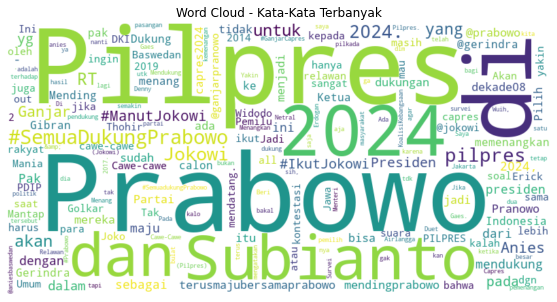

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_words = ' '.join(str(data['tweet']))
word_counts = data['tweet'].str.split(expand=True).stack().value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata-Kata Terbanyak')
plt.show()


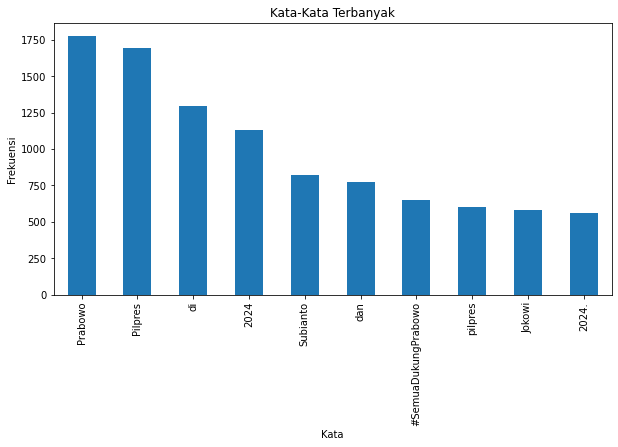

In [11]:
word_counts = data['tweet'].str.split(expand=True).stack().value_counts()
top_words = word_counts.head(10)  # Mengambil 10 kata teratas, ganti jumlah sesuai dengan kebutuhan Anda
plt.figure(figsize=(10, 5))
top_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-Kata Terbanyak')
plt.show()

# FILTERING
regex

In [12]:
def preprocess_tweet2(tweet):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")
    tweet = re.sub(r'[0-9]+','', str(tweet))
    tweet = tweet.lower()  # convert to lower case
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # remove URLs
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)  # remove mentions and hashtags
    tweet = re.sub(r'\d+', '', tweet) # remove numbers
    tweet = re.sub(r'\.',' ', tweet) #
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))  # remove punctuations
    tweet = tweet.strip()
    tweet = re.sub(EMOJI_PATTERN, r'', tweet)
    tweet = re.sub(r'\n+', '', tweet)
    tweet = re.sub(r'\brt', '', tweet)
    return tweet
data['tweet']=data['tweet'].apply(preprocess_tweet2)


In [13]:
data = data.dropna()

In [14]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 543 data yang terduplikasi


In [15]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
1432,mantap sih mereka sudah bulat mendukung prabow...,56
2233,wuih mereka akan all out mendukung prabowo di ...,56
1469,mendukung yohanies sama dengan ingin pilpres ...,38
1055,jabar dan dki jakarta diakuinya jadi pilihan ...,15
1136,jokowi dianggap kian dukung prabowo untuk pilp...,12
...,...,...
769,didik j rachbini prediksi poros keempat yang ...,1
768,diberitakan sebelumnya immanuel ebenezer alias...,1
767,diaspora indonesia yang berasal dari kota di ...,1
766,diantaranya adalah karena menteri pertahanan t...,1


In [16]:
data = data.drop_duplicates(subset=['tweet'])

In [17]:
len(data)

2283

In [18]:
from nltk.tokenize import word_tokenize

def tokenize_column(text):
    if isinstance(text, str):  # Memastikan bahwa text adalah string
        return word_tokenize(text)
    else:
        return []  # Mengembalikan list kosong jika text bukan string

# Contoh penggunaan:
data['tweet'] = data['tweet'].apply(tokenize_column)

In [19]:
data.tweet.iloc[0]

['cawecawe',
 'yang',
 'dimaksud',
 'menurut',
 'jokowi',
 'tentu',
 'masih',
 'dalam',
 'koridor',
 'aturan',
 'dan',
 'tidak',
 'akan',
 'melanggar',
 'undangundang',
 'kare…']

In [20]:
stemmer = StemmerFactory().create_stemmer()
def stemming(batch):
    # Menerapkan stemming pada setiap teks dalam batch
    stemmed_batch = [stemmer.stem(text) if text.lower() != "pemilu" else text for text in batch]

    # Melakukan penghapusan stopwords pada setiap teks dalam batch

    return stemmed_batch

# Menambahkan hasil preprocessing ke dalam DataFrame
data['tweet'] = data['tweet'].apply(stemming)

# Hasil preprocessing data
print(data)

                            date         username  \
0      2023-05-30 23:59:46+00:00          oechups   
1      2023-05-30 23:59:44+00:00         AdeSaung   
2      2023-05-30 23:59:43+00:00      CHaendrajit   
3      2023-05-30 23:59:35+00:00    Minionscupacu   
4      2023-05-30 23:59:26+00:00  AntonJogjaEtnik   
...                          ...              ...   
11674  2023-05-29 01:30:40+00:00      kudalumpin6   
11680  2023-05-29 01:29:46+00:00          sbram01   
11694  2023-05-29 01:25:45+00:00    rkyt_bersuara   
11695  2023-05-29 01:25:08+00:00      jumjumareka   
11698  2023-05-29 01:24:58+00:00         voidotid   

                                                   tweet  
0      [cawecawe, yang, maksud, turut, jokowi, tentu,...  
1      [resmi, presiden, joko, widodo, cawe, cawe, ka...  
2      [jokowi, yth, ap, tdk, lbh, bgus, anda, ntral,...  
3      [denny, indrayana, anies, akan, gagal, maju, d...  
4      [lsi, jokowi, ingin, ganjarprabowo, di, pilpre...  
...      

In [21]:
data.tweet.iloc[0]

['cawecawe',
 'yang',
 'maksud',
 'turut',
 'jokowi',
 'tentu',
 'masih',
 'dalam',
 'koridor',
 'atur',
 'dan',
 'tidak',
 'akan',
 'langgar',
 'undangundang',
 'kare']

In [22]:
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()
def stopword(batch):
    # Melakukan penghapusan stopwords pada setiap teks dalam batch
    cleaned_batch = [stopword_remover.remove(text) for text in batch]
    cleaned_batch = [text for text in cleaned_batch if all(word not in text.lower() for word in ['yg', 'dgn', 'kl','spt','pk','tp','krn','dr','utk','lg','gw','si','jg','jd','shg','sbg'])]

    return cleaned_batch


# Menambahkan hasil preprocessing ke dalam DataFrame
data['tweet'] = data['tweet'].apply(stopword)

# Hasil preprocessing data
print(data)

                            date         username  \
0      2023-05-30 23:59:46+00:00          oechups   
1      2023-05-30 23:59:44+00:00         AdeSaung   
2      2023-05-30 23:59:43+00:00      CHaendrajit   
3      2023-05-30 23:59:35+00:00    Minionscupacu   
4      2023-05-30 23:59:26+00:00  AntonJogjaEtnik   
...                          ...              ...   
11674  2023-05-29 01:30:40+00:00      kudalumpin6   
11680  2023-05-29 01:29:46+00:00          sbram01   
11694  2023-05-29 01:25:45+00:00    rkyt_bersuara   
11695  2023-05-29 01:25:08+00:00      jumjumareka   
11698  2023-05-29 01:24:58+00:00         voidotid   

                                                   tweet  
0      [cawecawe, , , , jokowi, , , , koridor, atur, ...  
1      [resmi, joko, widodo, cawe, cawe, , cawe, cawe...  
2      [jokowi, yth, ap, tdk, lbh, bgus, , ntral, bia...  
3      [denny, anies, , gagal, maju, , pilpres, , ma,...  
4      [jokowi, , ganjarprabowo, , pilpres, ri, joko,...  
...      

In [23]:
data.tweet.iloc[0]

['cawecawe',
 '',
 '',
 '',
 'jokowi',
 '',
 '',
 '',
 'koridor',
 'atur',
 '',
 '',
 '',
 'langgar',
 'undangundang',
 'kare']

In [24]:
def to_text(daftar_token):
    tokens = [token for token in daftar_token if token != '']
    kalimat = ' '.join(tokens)
    return kalimat
data['tweet'] = data['tweet'].apply(to_text)

In [25]:
from nltk.tokenize import word_tokenize
def labelling(tweet):
    # tweet = preprocess_tweet(tweet)
    clean_tokens = word_tokenize(tweet) #tokenize
    # clean_tokens = [stemmer.stem(word) for word in tweet_tokens if word not in stopwords] #stemming & stopword removal
    positive_words = open("positive.txt").read().splitlines()
    negative_words = open("negative.txt").read().splitlines()
    positive_count = sum([1 for word in clean_tokens if word in positive_words])
    negative_count = sum([1 for word in clean_tokens if word in negative_words])
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    else:
        return 'Neutral'
data['sentiment'] = data['tweet'].apply(labelling)

In [26]:
data.sentiment.value_counts()

Neutral     1141
Positive     712
Negative     430
Name: sentiment, dtype: int64

In [27]:
dat = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {dat} data yang terduplikasi')

ada sebanyak 270 data yang terduplikasi


In [28]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
429,dukung prabowo pilpres prabowo subianto,8
1524,prabowo menang pilpres prabowo subianto,7
1413,pilpres paslon rocky gerung juluk china istana,5
1008,langkah pilpres pasang kandidat caprescawapres...,5
819,jokowi netral pilpres cawecawe,5
...,...,...
690,iya soh mosok cawecawe pilpres nyuruh rakyat m...,1
689,iya kalo ngak jokowi bu mega rangkul prabowo h...,1
688,iya duit embat libat partai ato plate mmng sur...,1
687,iya duit embat libat partai ato plate mmng sur...,1


In [29]:
data = data.drop_duplicates(subset=['tweet'])

In [30]:
data = data.dropna()

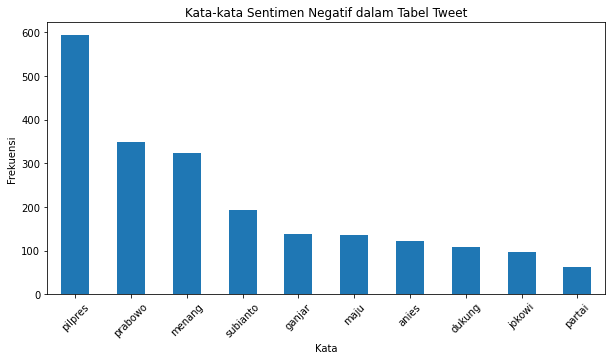

In [31]:
positif_word_counts = data[data['sentiment'] == 'Positive']['tweet'].str.split(expand=True).stack().value_counts()
top_pos_words = positif_word_counts.head(10)
plt.figure(figsize=(10, 5))
top_pos_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata Sentimen Negatif dalam Tabel Tweet')
plt.xticks(rotation=45)
plt.show()

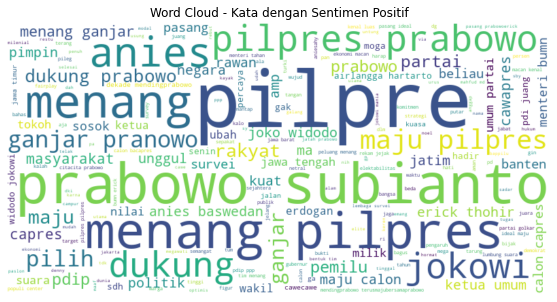

In [32]:
data_positif = data[data['sentiment'] == 'Positive']
all_words_positif = ' '.join(data_positif['tweet'])
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(all_words_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata dengan Sentimen Positif')
plt.show()

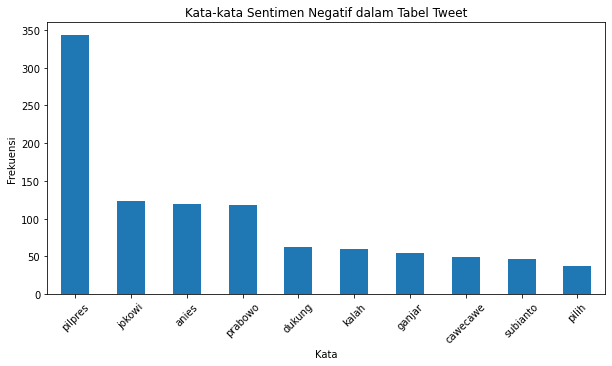

In [33]:
negatif_word_counts = data[data['sentiment'] == 'Negative']['tweet'].str.split(expand=True).stack().value_counts()
top_negatif_words = negatif_word_counts.head(10)
plt.figure(figsize=(10, 5))
top_negatif_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata Sentimen Negatif dalam Tabel Tweet')
plt.xticks(rotation=45)
plt.show()

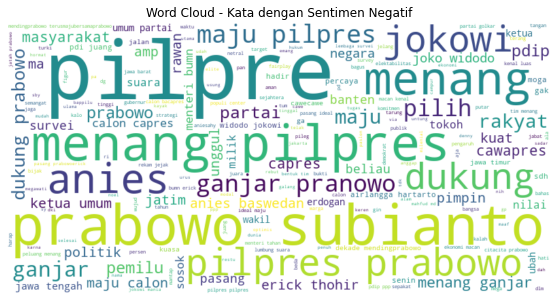

In [34]:
data_negatif = data[data['sentiment'] == 'Negative']
all_words_neg = ' '.join(data_negatif['tweet'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(all_words_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata dengan Sentimen Negatif')
plt.show()

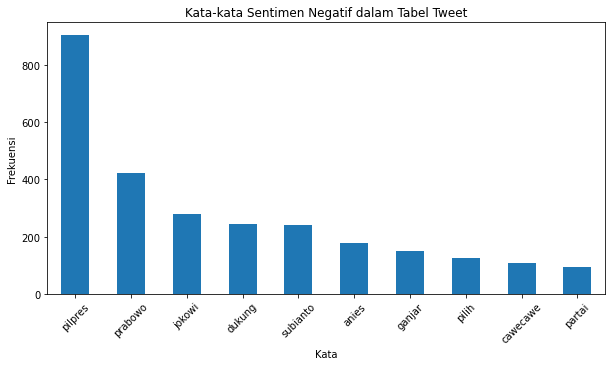

In [35]:
netral_word_counts = data[data['sentiment'] == 'Neutral']['tweet'].str.split(expand=True).stack().value_counts()
top_net_words = netral_word_counts.head(10)
plt.figure(figsize=(10, 5))
top_net_words.plot(kind='bar')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata Sentimen Negatif dalam Tabel Tweet')
plt.xticks(rotation=45)
plt.show()

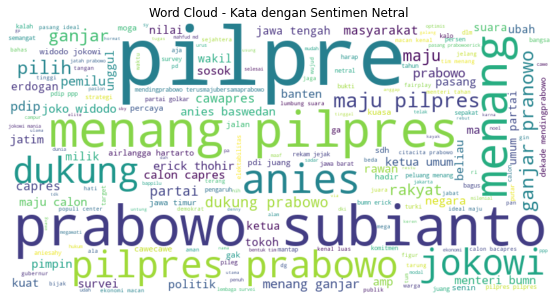

In [36]:
data_netral = data[data['sentiment'] == 'Neutral']
all_words_net = ' '.join(data_negatif['tweet'])
wordcloud_net = WordCloud(width=800, height=400, background_color='white').generate(all_words_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_net, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata dengan Sentimen Netral')
plt.show()

In [37]:
data.isnull().sum()

date         0
username     0
tweet        0
sentiment    0
dtype: int64

epoch: 1 acc: 0.6898263027295285


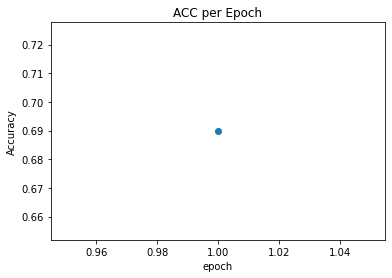

Akurasi: 68.98%


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = CountVectorizer()

# Melakukan transformasi teks menjadi vektor fitur
X = vectorizer.fit_transform(data['tweet'].astype(str))
# Y = vectorizer.fit_transform(data['sentiment'])

epoch = 1
accuracy_values = np.zeros(epoch)
# Membagi data menjadi data latih dan data uji
for epochs in range(epoch):
    X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=None)
    naive_bayes = MultinomialNB()
    training = naive_bayes.fit(X_train, y_train)
    prediction =  naive_bayes.predict(X_test)

    accuracy = accuracy_score(y_test, prediction)
    accuracy_values[epochs] = accuracy

    print("epoch:", epochs + 1, "acc:", accuracy)
plt.plot(range(1,epoch + 1), accuracy_values, marker='o')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('ACC per Epoch')
plt.show()



y_pred = naive_bayes.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

# MCCV

Iterasi 1: 0.6972704714640199
Iterasi 2: 0.7096774193548387
Iterasi 3: 0.6600496277915633
Iterasi 4: 0.674937965260546
Iterasi 5: 0.6923076923076923
Iterasi 6: 0.707196029776675
Iterasi 7: 0.6823821339950372
Iterasi 8: 0.6923076923076923
Iterasi 9: 0.6898263027295285
Iterasi 10: 0.7344913151364765
Iterasi 11: 0.6898263027295285
Iterasi 12: 0.707196029776675
Iterasi 13: 0.6650124069478908
Iterasi 14: 0.6799007444168734
Iterasi 15: 0.6674937965260546
Iterasi 16: 0.6575682382133995
Iterasi 17: 0.7121588089330024
Iterasi 18: 0.7146401985111662
Iterasi 19: 0.6451612903225806
Iterasi 20: 0.7146401985111662
Iterasi 21: 0.7096774193548387
Iterasi 22: 0.7369727047146402
Iterasi 23: 0.71712158808933
Iterasi 24: 0.6625310173697271
Iterasi 25: 0.6823821339950372
Iterasi 26: 0.6799007444168734
Iterasi 27: 0.7295285359801489
Iterasi 28: 0.7121588089330024
Iterasi 29: 0.71712158808933
Iterasi 30: 0.7146401985111662
Iterasi 31: 0.6650124069478908
Iterasi 32: 0.7369727047146402
Iterasi 33: 0.6923076923

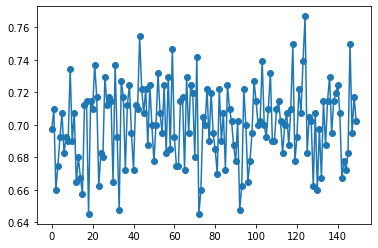

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle_split = ShuffleSplit(n_splits=150, test_size=0.2, random_state=33)

# Melakukan cross-validation dengan ShuffleSplit
scores = cross_val_score(naive_bayes, X, data['sentiment'], cv=shuffle_split, scoring='accuracy')
x = []
# Menampilkan skor akurasi untuk setiap iterasi cross-validation
for i, score in enumerate(scores):
    print(f"Iterasi {i+1}: {score}")
    x.append(score)

# Menampilkan rata-rata skor akurasi dari cross-validation
print(len(x))
print("Rata-rata skor akurasi: {:.2f} %".format(scores.mean()*100))
print("Skor tertinggi: {:.2f} %".format(scores.max()*100))
plt.plot(range(len(x)), x, marker='o')

In [40]:
acc_mnb = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(acc_mnb))

conf_matrix_mnb = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n {}".format(conf_matrix_mnb))
print(classification_report(y_test, y_pred))

Accuracy: 0.6898
Confusion matrix:
 [[ 48  26   6]
 [ 20 153  32]
 [  7  34  77]]
              precision    recall  f1-score   support

    Negative       0.64      0.60      0.62        80
     Neutral       0.72      0.75      0.73       205
    Positive       0.67      0.65      0.66       118

    accuracy                           0.69       403
   macro avg       0.68      0.67      0.67       403
weighted avg       0.69      0.69      0.69       403



[[ 48  26   6]
 [ 20 153  32]
 [  7  34  77]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


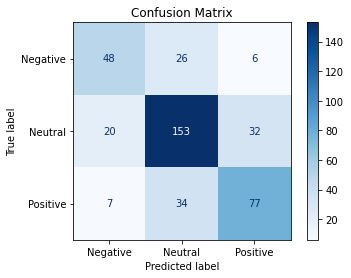

In [41]:
class_names = sorted(data['sentiment'].unique())
disp = plot_confusion_matrix(training, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[239  63   8]
 [ 15 745  33]
 [  6  36 465]]


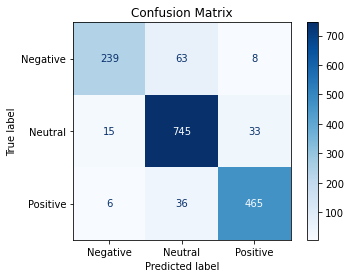

In [42]:
class_names = sorted(data['sentiment'].unique())
disp = plot_confusion_matrix(training, X_train, y_train,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:{:.2f}%".format(accuracy * 100))

# Menghitung dan menampilkan presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision * 100))

# Menghitung dan menampilkan recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall * 100))

# Menghitung dan menampilkan F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f1 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:68.98%
Presisi: 68.85%
Recall:68.98%
F1-score:68.89%
Persentase Klasifikasi:
Positif: 28.5%
Negatif: 18.6%
Netral: 52.9%


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_train)

# Menghitung dan menampilkan akurasi
accuracy1 = accuracy_score(y_train, y_pred)
print("Akurasi:{:.2f}%".format(accuracy1 * 100))

# Menghitung dan menampilkan presisi
precision1 = precision_score(y_train, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision1 * 100))

# Menghitung dan menampilkan recall
recall1 = recall_score(y_train, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall1 * 100))

# Menghitung dan menampilkan F1-score
f11 = f1_score(y_train, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f11 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:90.00%
Presisi: 90.12%
Recall:90.00%
F1-score:89.89%
Persentase Klasifikasi:
Positif: 31.4%
Negatif: 16.1%
Netral: 52.4%


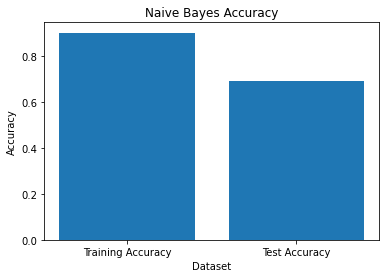

0.21017369727047153
0.9
0.6898263027295285


In [45]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Memprediksi label pada data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung akurasi pada data latih dan data uji
akurasi_train = accuracy_score(y_train, y_train_pred)
akurasi_test = accuracy_score(y_test, y_test_pred)

# Membuat grafik akurasi
labels = ['Training Accuracy', 'Test Accuracy']
values = [akurasi_train, akurasi_test]

plt.bar(labels, values)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy')
plt.show()

print(akurasi_train - akurasi_test)
print(akurasi_train)
print(akurasi_test)

[0.37158235 0.36077715 0.31334354 0.26741744 0.24875484 0.25433988
 0.2529744  0.24716907 0.23157495 0.21093848]


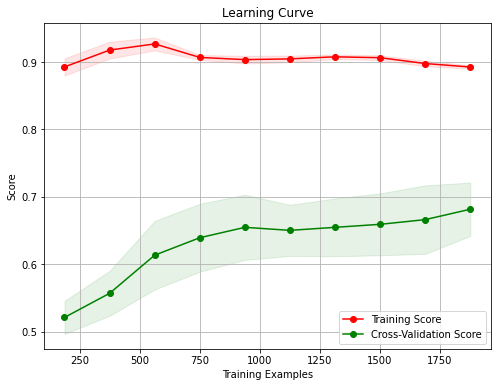

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=15, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    print(train_scores_mean - test_scores_mean)
    plt.legend(loc='best')
    plt.show()

# Contoh penggunaan
estimator = MultinomialNB()
plot_learning_curve(estimator, X, data['sentiment'])


In [47]:
data.tweet.iloc[0]

'cawecawe jokowi koridor atur langgar undangundang kare'

In [54]:
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    def preprocess_tweet2(tweet):
        EMOJI_PATTERN = re.compile(
        "(["
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "])")
        tweet = re.sub(r'[0-9]+','', str(tweet))
        tweet = tweet.lower()  # convert to lower case
        tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # remove URLs
        tweet = re.sub(r'\@\w+|\#\w+', '', tweet)  # remove mentions and hashtags
        tweet = re.sub(r'\d+', '', tweet) # remove numbers
        tweet = re.sub(r'\.',' ', tweet) #
        tweet = tweet.translate(str.maketrans("", "", string.punctuation))  # remove punctuations
        tweet = tweet.strip()
        tweet = re.sub(EMOJI_PATTERN, r'', tweet)
        tweet = re.sub(r'\n+', '', tweet)
        tweet = re.sub(r'^\s+', '', tweet)
        tweet = re.sub(r'\brt', '', tweet)
        return tweet
#stemming
    def stemming(text):
        # Menerapkan stemming pada setiap teks dalam batch
        stem_text = stemmer.stem(text) if text.lower() != "pemilu" else text
        return stem_text
# Stopword
    def stopword(text):
        # Melakukan penghapusan stopwords pada setiap teks dalam batch
        stopwords = ['yg', 'dgn', 'kl', 'spt', 'pk', 'tp', 'krn', 'dr', 'utk', 'lg', 'gw', 'si', 'jg', 'jd', 'shg', 'sbg']
        stopwords = set(stopwords)
        words = text.split()
        cleaned_words = [word for word in words if word.lower() not in stopwords]
        cleaned_text = ' '.join(cleaned_words)
        return cleaned_text 
    # Melakukan transformasi teks input menjadi vektor fitur
    clean = preprocess_tweet2(input_text)
    stem_text = stemming(clean)
    clean_text = stopword(stem_text)
    text_vectorized = vectorizer.transform([clean_text])
    prediction = model.predict(text_vectorized)
    menarik = model.predict_proba(text_vectorized)

    
    # Melakukan prediksi pada input
    pred = naive_bayes.predict(text_vectorized)
    positive_count = (y_pred == 'Positive').sum()
    negative_count = (y_pred == 'Negative').sum()
    neutral_count = (y_pred == 'Neutral').sum()
    na = training.predict_proba(text_vectorized)
    # Menampilkan hasil prediksi
    print(clean_text)
    print("Hasil Prediksi: ", pred[0])
    print("negatif",menarik[[0],[0]])
    print("netral",menarik[[0],[1]])
    print("positif",menarik[[0],[2]])
    print()

prabowo dan puan dam
Hasil Prediksi:  Neutral
negatif [0.11276951]
netral [0.63542065]
positif [0.25180984]

damai
Hasil Prediksi:  Positive
negatif [0.17348403]
netral [0.1440336]
positif [0.68248237]

prabowo dami
Hasil Prediksi:  Neutral
negatif [0.09523548]
netral [0.55113042]
positif [0.3536341]

damai
Hasil Prediksi:  Positive
negatif [0.17348403]
netral [0.1440336]
positif [0.68248237]

prabowo damai
Hasil Prediksi:  Positive
negatif [0.0846735]
netral [0.15903617]
positif [0.75629032]



In [49]:
print(na[[0],[0]])

[0.01699089]


In [50]:
def predict_sentiment_proba(text):
    stem_text = stemmer.stem(text)
    clean_text = stopword_remover.remove(stem_text)
    text_vectorized = vectorizer.transform([clean_text])
    proba = model.predict_proba(text_vectorized)[0]
    return proba

# Text yang akan dianalisis sentimennya
text = "Ini adalah contoh kalimat untuk analisis sentimen."

# Melakukan prediksi probabilitas sentimen
sentiment_proba = predict_sentiment_proba(text)
positive_proba = sentiment_proba[2]
negative_proba = sentiment_proba[0]
neutral_proba = sentiment_proba[1]

# Menampilkan hasil probabilitas sentimen
print(sentiment_proba)
print(f"Probabilitas Sentimen Positif: {positive_proba:.2f}")
print(f"Probabilitas Sentimen Negatif: {negative_proba:.2f}")
print(f"Probabilitas Sentimen Netral: {neutral_proba:.2f}")

[0.23919545 0.25781609 0.50298846]
Probabilitas Sentimen Positif: 0.50
Probabilitas Sentimen Negatif: 0.24
Probabilitas Sentimen Netral: 0.26


In [51]:
# Menghitung probabilitas sentimen untuk setiap kata dalam kalimat
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    def calculate_word_sentiment_probabilities(text):
        stem_text = stemmer.stem(text)
        clean_text = stopword_remover.remove(stem_text)
        words = clean_text.split()
        word_sentiment_probabilities = []

        for word in words:
            text_vectorized = vectorizer.transform([word])
            proba = model.predict_proba(text_vectorized)[0]
            sentiment_probabilities = {
                'Word': word,
                'Positive': proba[2],
                'Negative': proba[0],
                'Neutral': proba[1]
            }
            word_sentiment_probabilities.append(sentiment_probabilities)

        return word_sentiment_probabilities

    # Kalimat yang akan dianalisis sentimennya
    # sentence = "prabowo ganjar anies"

    # Menghitung probabilitas sentimen untuk setiap kata dalam kalimat
    word_probabilities = calculate_word_sentiment_probabilities(input_text)

    # Menampilkan hasil probabilitas sentimen untuk setiap kata
    for word_probability in word_probabilities:
        word = word_probability['Word']
        positive_proba = word_probability['Positive']
        negative_proba = word_probability['Negative']
        neutral_proba = word_probability['Neutral']
        print(f"Kata: {word}")
        print(f"Probabilitas Sentimen Positif: {positive_proba:.2f}")
        print(f"Probabilitas Sentimen Negatif: {negative_proba:.2f}")
        print(f"Probabilitas Sentimen Netral: {neutral_proba:.2f}")
        print()
